In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashchandel","key":"dabeeac82c27f79a751f5813827d298e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle competitions download -c facial-keypoints-detection

 56% 9.00M/16.0M [00:00<00:00, 32.0MB/s]
100% 16.0M/16.0M [00:00<00:00, 53.4MB/s]
 87% 52.0M/60.1M [00:00<00:00, 72.2MB/s]
100% 60.1M/60.1M [00:00<00:00, 72.7MB/s]
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 120MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 206MB/s]


In [4]:

!unzip -q '/content/test.zip'
!unzip -q '/content/training.zip'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
data=pd.read_csv('/content/training.csv')
data.head(10)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,21.765533,38.565533,59.766280,31.651290,83.313645,35.358056,39.408000,30.546393,14.949084,32.150131,52.468486,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,24.108242,33.138040,58.661154,27.091329,76.225289,29.107329,40.233020,27.091329,19.500886,27.667329,46.855087,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,21.025398,40.038245,56.014136,27.333903,84.130485,31.291014,39.769165,26.917375,11.861592,31.915806,47.891883,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,20.325120,37.615360,57.507840,25.030400,79.273600,28.634240,36.342400,26.174720,12.888960,31.322880,48.069760,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,22.868308,40.040615,56.971077,28.489723,75.9470

In [7]:
data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
data.shape

(7049, 31)

In [9]:
data1=data.copy()

In [10]:
test_data=pd.read_csv('/content/test.csv')
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [11]:
data1.fillna(method='ffill',inplace=True)

In [12]:
data1.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [13]:
image=data1['Image']
imag=[]
for i in range(len(image)):
  img=np.float32(image[i].split()).reshape(96,96,1)
  imag.append(img)


In [14]:
imag=np.array(imag)
imag.shape

(7049, 96, 96, 1)

In [15]:
def display_image(img,nrows=5,ncols=5):
  ix=np.random.randint(0,len(img),nrows*ncols)
  fig,ax=plt.subplots(figsize=(10,10),nrows=5,ncols=ncols)
  ax=ax.ravel()
  for i in range(nrows*ncols):
    ax[i].imshow(img[ix[i]].reshape(96,96),cmap='gray')



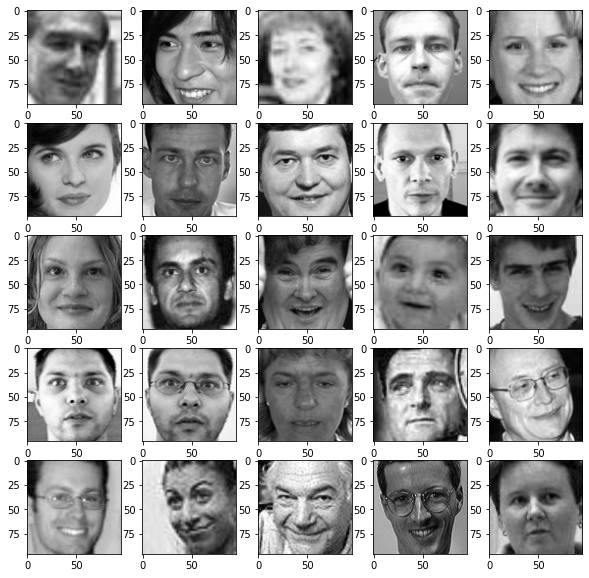

In [16]:
display_image(imag)

In [17]:
test_image=test_data['Image']
test_imag=[]
for i in range(len(test_image)):
  test_img=np.float32(test_image[i].split()).reshape(96,96,1)
  test_imag.append(test_img)


In [18]:
test_imag=np.array(test_imag)
test_imag.shape

(1783, 96, 96, 1)

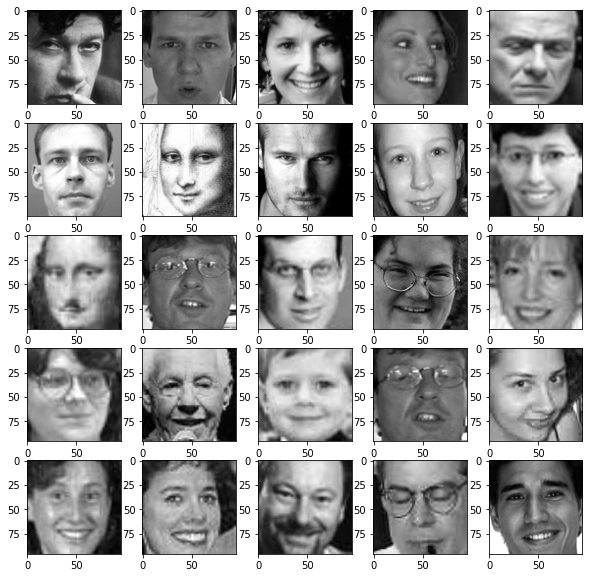

In [19]:
display_image(test_imag)

In [20]:
keypoint=list(data1.columns)[:-1]


In [21]:
def display_image_with_key(n_rows=5,n_cols=5):
  ix=np.random.randint(0,len(imag),n_rows*n_cols)
  keypoint=list(data1.columns)[:-1]
  fig,ax=plt.subplots(figsize=(10,10),nrows=n_rows,ncols=n_cols)
  ax=ax.ravel()
  for i in range(n_rows*n_cols):
    xy=data1.loc[ix[i],keypoint].values.reshape(15,2)
    ax[i].imshow(imag[ix[i]].reshape(96,96),cmap='gray')
    ax[i].plot(xy[:,0],xy[:,1],'ro')    

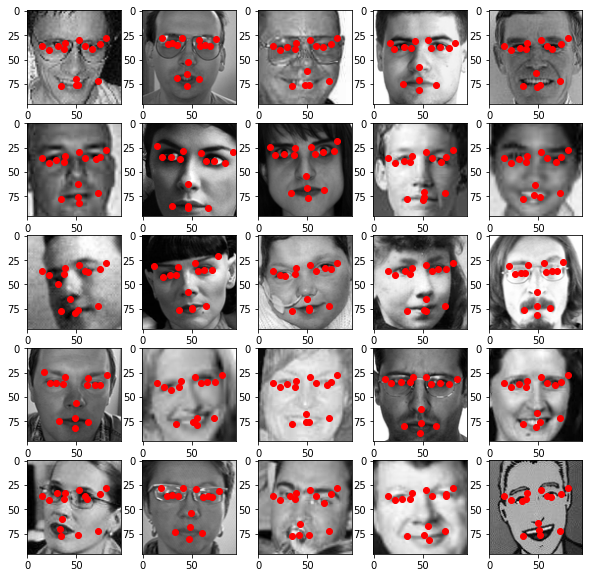

In [22]:
display_image_with_key()

In [23]:
training=data1.drop(columns='Image')
y_train=[]
for i in range(7049):
  y=training.iloc[i,:]
  y_train.append(y)
y_train=np.array(y_train,dtype=np.float32)
y_train


array([[66.03356 , 39.002274, 30.227007, ..., 72.935455, 43.130707,
        84.48577 ],
       [64.33294 , 34.970078, 29.949276, ..., 70.266556, 45.467915,
        85.48017 ],
       [65.05705 , 34.90964 , 30.90379 , ..., 70.19179 , 47.27495 ,
        78.65937 ],
       ...,
       [66.690735, 36.845222, 31.66642 , ..., 75.96359 , 49.46257 ,
        78.11712 ],
       [70.96508 , 39.853664, 30.543285, ..., 75.96359 , 50.065186,
        79.58645 ],
       [66.93831 , 43.42451 , 31.09606 , ..., 75.96359 , 45.90048 ,
        82.773094]], dtype=float32)

#Model building


In [24]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [25]:
model=Sequential()
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [26]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])


In [27]:
model.fit(imag,y_train,epochs = 50,batch_size = 256,validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 7s 300ms/step - loss: 363.3359 - mae: 12.4483 - val_loss: 746.1288 - val_mae: 25.2735
Epoch 2/50
23/23 [==============================] - 6s 266ms/step - loss: 33.6970 - mae: 4.5224 - val_loss: 217.9786 - val_mae: 13.6972
Epoch 3/50
23/23 [==============================] - 6s 269ms/step - loss: 26.4716 - mae: 3.9751 - val_loss: 182.1863 - val_mae: 12.4349
Epoch 4/50
23/23 [==============================] - 6s 269ms/step - loss: 24.9260 - mae: 3.8421 - val_loss: 104.9439 - val_mae: 9.3997
Epoch 5/50
23/23 [==============================] - 6s 270ms/step - loss: 22.4949 - mae: 3.6273 - val_loss: 69.6996 - val_mae: 7.5906
Epoch 6/50
23/23 [==============================] - 6s 273ms/step - loss: 21.2049 - mae: 3.5217 - val_loss: 68.8742 - val_mae: 7.5769
Epoch 7/50
23/23 [==============================] - 6s 276ms/step - loss: 19.8463 - mae: 3.3937 - val_loss: 48.8899 - val_mae: 6.3383
Epoch 8/50
23/23 [==============================] - 6

In [28]:
test_imag

array([[[[182.],
         [183.],
         [182.],
         ...,
         [182.],
         [182.],
         [182.]],

        [[182.],
         [181.],
         [181.],
         ...,
         [182.],
         [182.],
         [182.]],

        [[182.],
         [181.],
         [180.],
         ...,
         [182.],
         [181.],
         [182.]],

        ...,

        [[ 42.],
         [ 36.],
         [ 20.],
         ...,
         [126.],
         [136.],
         [153.]],

        [[ 31.],
         [  8.],
         [  0.],
         ...,
         [  9.],
         [ 11.],
         [ 33.]],

        [[  3.],
         [  0.],
         [  1.],
         ...,
         [  8.],
         [  5.],
         [  5.]]],


       [[[ 76.],
         [ 87.],
         [ 81.],
         ...,
         [120.],
         [115.],
         [117.]],

        [[ 68.],
         [ 85.],
         [ 84.],
         ...,
         [132.],
         [111.],
         [106.]],

        [[ 63.],
         [ 78.],
      

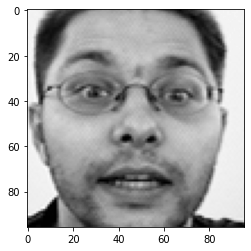

In [29]:
plt.imshow(test_imag[0].reshape(96,96),cmap='gray')

In [30]:
test_data

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [31]:
pred=model.predict(test_imag)
pred

array([[70.2771  , 39.12983 , 30.992126, ..., 72.23366 , 51.857635,
        87.83313 ],
       [71.28918 , 38.831455, 29.973236, ..., 76.860725, 52.574417,
        89.311485],
       [69.1186  , 39.632378, 33.042866, ..., 76.95116 , 53.150833,
        87.75277 ],
       ...,
       [71.9325  , 43.845375, 34.062416, ..., 78.30556 , 49.305466,
        82.59096 ],
       [65.24173 , 40.443832, 29.559319, ..., 78.347694, 44.18906 ,
        78.1793  ],
       [70.564514, 42.439976, 34.428036, ..., 78.42981 , 49.167797,
        82.392204]], dtype=float32)

In [39]:
ans=pd.DataFrame(pred,columns=data1.columns[:-1])
ans

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,70.277100,39.129829,30.992126,39.496563,62.334793,39.186481,76.538689,39.441391,37.943340,39.675301,23.023376,40.216854,59.067745,29.177570,83.783516,31.464174,40.237938,29.696039,14.884531,32.861782,52.293835,56.853996,67.089470,77.960999,34.569000,79.668228,50.788521,72.233658,51.857635,87.833130
1,71.289177,38.831455,29.973236,40.234787,62.066105,38.628376,77.036324,37.783047,38.439705,40.668732,22.612106,41.109077,57.509521,30.981825,83.981186,30.680862,39.990120,32.744389,14.328426,35.237373,51.404083,65.942841,70.521652,77.503242,35.494549,81.116638,52.184578,76.860725,52.574417,89.311485
2,69.118599,39.632378,33.042866,41.455364,61.861885,38.965508,75.336365,38.363266,39.079807,41.114597,24.809702,41.476402,57.471943,31.846352,81.868042,31.320601,41.125702,33.499638,16.925028,35.648354,51.763702,63.893612,68.712120,78.254639,37.938351,81.723602,52.794888,76.951157,53.150833,87.752769
3,69.474922,41.592121,33.226151,42.507153,61.539478,40.350147,75.581932,40.599285,38.743603,42.068203,24.343857,42.546059,57.324463,31.736517,82.467285,33.278225,40.485455,33.375145,16.768465,35.994514,50.809063,58.008400,67.902748,78.535721,35.452721,81.361374,50.923298,74.590401,51.685345,85.829369
4,69.775696,38.659962,29.768154,40.867329,62.005539,38.355186,76.652664,38.313259,37.712147,40.346535,22.633289,41.273239,57.982788,29.455051,83.494080,30.417349,39.156395,31.129276,14.321417,34.671734,51.129128,57.960392,69.618744,76.650436,35.189648,80.148041,51.740520,73.303062,52.488251,86.308266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,66.891167,40.989952,31.988148,41.580105,60.719616,37.409046,75.744530,36.353813,39.042210,41.072647,23.034279,41.477070,55.046204,31.247566,83.116043,29.842833,40.300312,34.551861,14.918472,37.808891,49.302723,67.651939,74.083778,74.288506,35.784348,80.006409,53.136894,77.965706,49.995811,80.264900
1779,67.488007,37.757156,31.274818,45.504757,60.881500,37.408741,76.132523,35.593052,39.138729,41.479794,22.633518,42.101158,55.063423,31.304165,83.158371,29.376989,40.256115,35.459045,14.763424,38.426888,55.074913,69.292740,75.106850,73.238235,35.549152,79.594749,53.516026,77.843826,57.205219,80.206383
1780,71.932503,43.845375,34.062416,39.579983,61.597794,37.105083,76.602013,35.788147,39.041779,40.990875,23.042646,41.645569,55.231735,31.012987,84.644363,29.603617,40.262127,35.055714,14.800812,37.991104,50.724190,70.737991,75.788353,74.205147,35.718220,80.853241,53.666897,78.305557,49.305466,82.590958
1781,65.241730,40.443832,29.559319,39.921532,60.848507,37.091930,76.793396,35.249622,38.853992,41.086964,22.326990,41.954033,54.126892,30.700882,84.578697,29.160250,39.363766,35.033314,14.376266,38.151337,41.275074,66.629379,76.097984,73.974075,35.814510,80.708786,53.079842,78.347694,44.189060,78.179298


In [32]:
P=pred.flatten()
P.shape

(53490,)

In [40]:
Final_ans=pd.concat((test_data,ans),axis=1)
Final_ans

,ImageId,Image,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,1,182 183 182 182 180 180 176 169 156 137 124 10...,70.277100,39.129829,30.992126,39.496563,62.334793,39.186481,76.538689,39.441391,37.943340,39.675301,23.023376,40.216854,59.067745,29.177570,83.783516,31.464174,40.237938,29.696039,14.884531,32.861782,52.293835,56.853996,67.089470,77.960999,34.569000,79.668228,50.788521,72.233658,51.857635,87.833130
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...,71.289177,38.831455,29.973236,40.234787,62.066105,38.628376,77.036324,37.783047,38.439705,40.668732,22.612106,41.109077,57.509521,30.981825,83.981186,30.680862,39.990120,32.744389,14.328426,35.237373,51.404083,65.942841,70.521652,77.503242,35.494549,81.116638,52.184578,76.860725,52.574417,89.311485
2,3,177 176 174 170 169 169 168 166 166 166 161 14...,69.118599,39.632378,33.042866,41.455364,61.861885,38.965508,75.336365,38.363266,39.079807,41.114597,24.809702,41.476402,57.471943,31.846352,81.868042,31.320601,41.125702,33.499638,16.925028,35.648354,51.763702,63.893612,68.712120,78.254639,37.938351,81.723602,52.794888,76.951157,53.150833,87.752769
3,4,176 174 174 175 174 174 176 176 175 171 165 15...,69.474922,41.592121,33.226151,42.507153,61.539478,40.350147,75.581932,40.599285,38.743603,42.068203,24.343857,42.546059,57.324463,31.736517,82.467285,33.278225,40.485455,33.375145,16.768465,35.994514,50.809063,58.008400,67.902748,78.535721,35.452721,81.361374,50.923298,74.590401,51.685345,85.829369
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...,69.775696,38.659962,29.768154,40.867329,62.005539,38.355186,76.652664,38.313259,37.712147,40.346535,22.633289,41.273239,57.982788,29.455051,83.494080,30.417349,39.156395,31.129276,14.321417,34.671734,51.129128,57.960392,69.618744,76.650436,35.189648,80.148041,51.740520,73.303062,52.488251,86.308266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...,66.891167,40.989952,31.988148,41.580105,60.719616,37.409046,75.744530,36.353813,39.042210,41.072647,23.034279,41.477070,55.046204,31.247566,83.116043,29.842833,40.300312,34.551861,14.918472,37.808891,49.302723,67.651939,74.083778,74.288506,35.784348,80.006409,53.136894,77.965706,49.995811,80.264900
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...,67.488007,37.757156,31.274818,45.504757,60.881500,37.408741,76.132523,35.593052,39.138729,41.479794,22.633518,42.101158,55.063423,31.304165,83.158371,29.376989,40.256115,35.459045,14.763424,38.426888,55.074913,69.292740,75.106850,73.238235,35.549152,79.594749,53.516026,77.843826,57.205219,80.206383
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...,71.932503,43.845375,34.062416,39.579983,61.597794,37.105083,76.602013,35.788147,39.041779,40.990875,23.042646,41.645569,55.231735,31.012987,84.644363,29.603617,40.262127,35.055714,14.800812,37.991104,50.724190,70.737991,75.788353,74.205147,35.718220,80.853241,53.666897,78.305557,49.305466,82.590958
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...,65.241730,40.443832,29.559319,39.921532,60.848507,37.091930,76.793396,35.249622,38.853992,41.086964,22.326990,41.954033,54.126892,30.700882,84.578697,29.160250,39.363766,35.033314,14.376266,38.151337,41.275074,66.629379,76.097984,73.974075,35.814510,80.708786,53.0798

In [41]:
df=pd.read_csv('/content/IdLookupTable.csv')
df

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [42]:
df1=df.copy()
for i in range(df1.shape[0]):
  x=np.array(Final_ans.loc[Final_ans['ImageId']==df1.loc[i,'ImageId'],df1.loc[i,'FeatureName']])[0]
  df1.loc[i,:]=df1.loc[i,:].fillna(x)
df1

  

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,70.277100
1,2,1,left_eye_center_y,39.129829
2,3,1,right_eye_center_x,30.992126
3,4,1,right_eye_center_y,39.496563
4,5,1,left_eye_inner_corner_x,62.334793
...,...,...,...,...
27119,27120,1783,right_eye_center_y,40.205112
27120,27121,1783,nose_tip_x,48.734119
27121,27122,1783,nose_tip_y,68.359215
27122,27123,1783,mouth_center_bottom_lip_x,49.167797


In [43]:
df1.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,70.277100
1,2,1,left_eye_center_y,39.129829
2,3,1,right_eye_center_x,30.992126
3,4,1,right_eye_center_y,39.496563
4,5,1,left_eye_inner_corner_x,62.334793


In [44]:
df2=df1.copy()
df3=df2.drop(columns=['ImageId','FeatureName'])
df3

,RowId,Location
0,1,70.277100
1,2,39.129829
2,3,30.992126
3,4,39.496563
4,5,62.334793
...,...,...
27119,27120,40.205112
27120,27121,48.734119
27121,27122,68.359215
27122,27123,49.167797


In [45]:
df3.to_csv('/content/submission.csv',index=False)

In [46]:
!kaggle competitions submit -c facial-keypoints-detection -f submission.csv -m "Message"

100% 628k/628k [00:00<00:00, 1.25MB/s]
Successfully submitted to Facial Keypoints Detection